[来源](https://www.kaggle.com/vanshjatana/analysis-on-coronavirus)

In [5]:
import pandas as pd 
cases = pd.read_csv("covid_19_data.csv")
cases.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [6]:
import plotly.offline as py
import plotly.express as px
py.init_notebook_mode(connected=True)
grp = cases.groupby(['ObservationDate', 'Country/Region'])[['Confirmed', 'Deaths', 'Recovered']].sum()
grp

Confirmed   Deaths  Recovered
ObservationDate Country/Region                                     
01/22/2020      Hong Kong                   0.0      0.0        0.0
                Japan                       2.0      0.0        0.0
                Macau                       1.0      0.0        0.0
                Mainland China            547.0     17.0       28.0
                South Korea                 1.0      0.0        0.0
                Taiwan                      1.0      0.0        0.0
                Thailand                    2.0      0.0        0.0
                US                          1.0      0.0        0.0
01/23/2020      Australia                   0.0      0.0        0.0
                Brazil                      0.0      0.0        0.0
                Colombia                    0.0      0.0        0.0
                Hong Kong                   2.0      0.0        0.0
                Japan                       1.0      0.0        0.0
                Macau                       2.0      0.0        0.0
                Mainland China            639.0     18.0       30.0
                Malaysia                    0.0      0.0        0.0
                Mexico                      0.0      0.0        0.0
                Philippines                 0.0      0.0        0.0
                Singapore                   1.0      0.0        0.0
                South Korea                 1.0      0.0        0.0
                Taiwan                      1.0      0.0        0.0
                Thailand                    3.0      0.0        0.0
                US                          1.0      0.0        0.0
                Vietnam                     2.0      0.0        0.0
01/24/2020      France                      2.0      0.0        0.0
                Hong Kong                   2.0      0.0        0.0
                Japan                       2.0      0.0        0.0
                Macau                       2.0      0.0        0.0
                Mainland China            916.0     26.0       36.0
                Singapore                   3.0      0.0        0.0
...                                         ...      ...        ...
04/21/2020      South Sudan                 4.0      0.0        0.0
                Spain                  204178.0  21282.0    82514.0
                Sri Lanka                 310.0      7.0      102.0
                Sudan                     107.0     12.0        8.0
                Suriname                   10.0      1.0        6.0
                Sweden                  15322.0   1765.0      550.0
                Switzerland             28063.0   1478.0    19400.0
                Syria                      42.0      3.0        6.0
                Taiwan                    425.0      6.0      217.0
                Tanzania                  254.0     10.0       11.0
                Thailand                 2811.0     48.0     2108.0
                Timor-Leste                23.0      0.0        1.0
                Togo                       86.0      6.0       56.0
                Trinidad and Tobago       115.0      8.0       28.0
                Tunisia                   884.0     38.0      148.0
                Turkey                  95591.0   2259.0    14918.0
                UK                     130172.0  17378.0      638.0
                US                     823786.0  44845.0    75204.0
                Uganda                     61.0      0.0       38.0
                Ukraine                  6125.0    161.0      367.0
                United Arab Emirates     7755.0     46.0     1443.0
                Uruguay                   535.0     11.0      313.0
                Uzbekistan               1678.0      6.0      357.0
                Venezuela                 285.0     10.0      117.0
                Vietnam                   268.0      0.0      216.0
                West Bank and Gaza        466.0      4.0       71.0
                Western Sa

In [2]:
grp = grp.reset_index()
grp['Date'] = pd.to_datetime(grp['ObservationDate'])
grp['Date'] = grp['Date'].dt.strftime('%m/%d/%Y')
grp['Active'] = grp['Confirmed'] - grp['Recovered'] - grp['Deaths']
grp['Country'] =  grp['Country/Region']
fig = px.choropleth(grp, locations="Country", locationmode='country names', 
                     color="Active", hover_name="Country/Region",hover_data = [grp.Confirmed, grp.Recovered,grp.Deaths,grp.Active],projection="mercator",
                     animation_frame="Date",width=1000, height=700,
                     color_continuous_scale='Reds',
                     range_color=[1000,50000],
                     title='World Map of Coronavirus')

fig.update(layout_coloraxis_showscale=True)
py.offline.iplot(fig)

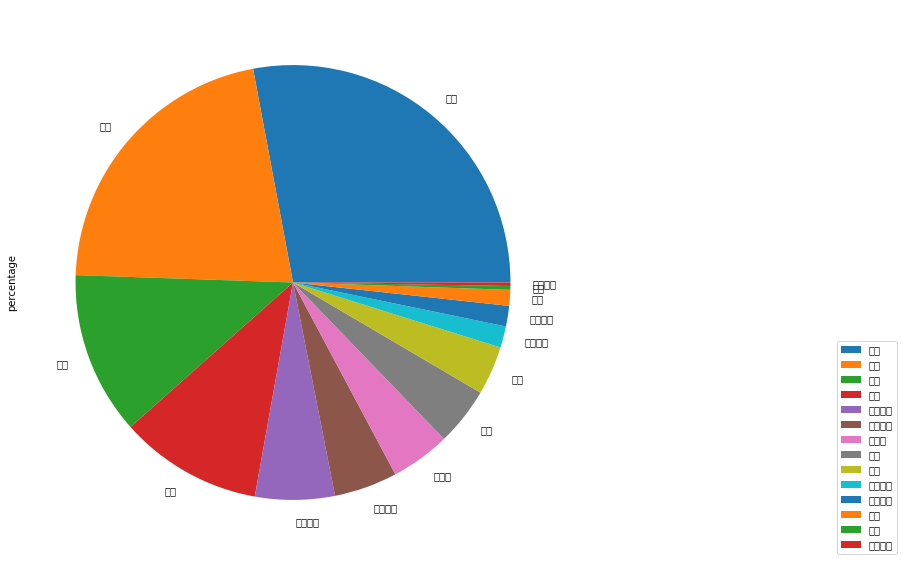

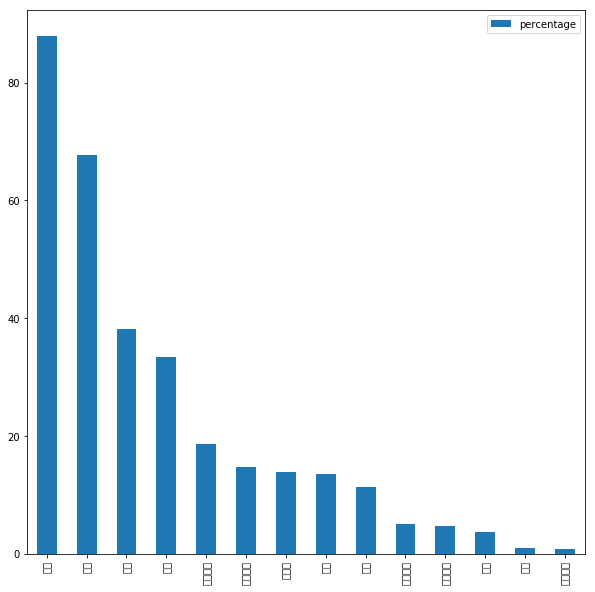

In [8]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
from datetime import date, timedelta
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

symptoms={'symptom':['发烧',
        '干咳',
        '疲劳',
        '有痰',
        '呼吸困难',
        '肌肉酸痛',
        '嗓子疼',
        '头痛',
        '发冷',
        '恶心想吐',
        '鼻子不通',
        '腹泻',
        '咳血',
        '结膜充血'],'percentage':[87.9,67.7,38.1,33.4,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]}

symptoms=pd.DataFrame(data=symptoms, index = symptoms['symptom'])
symptoms.set_index("symptom")
symptoms.plot.pie(y = 'percentage', figsize=(10,10)).legend(loc=(1.5,0))
plt.show()
symptoms.plot.bar(y = 'percentage', figsize=(10,10))
plt.show()